<h1 style="font-size: 3.5rem; color:#1e2460; text-align: center; ">Insertion-sort vs Counting-sort</h1>

# Introduzione
_Insertion-sort_ e _Counting-sort_ sono due algoritmi di ordinamento utilizzati per ordinare una lista di elementi. Come vedremo, l'_Insertion-sort_ è un algoritmo **semplice** da capire ed implementare, funziona bene per **piccoli insiemi di dati** o **dati parzialmente ordinati**, mentre il _Counting-sort_ richiede un'implementazione più elaborata ed è adatto a **grandi quantità di dati** con un **intervallo ristretto di valori**.

<h2 style="font-size: 2.5rem; color: #336699; text-align: left; border-bottom: 2px solid #336699;">Insertion-sort</h2>


## Breve descrizione
L'_insertion_ sort costruisce mano a mano l'array ordinato inserendo ciascun elemento nella sua **posizione corretta sequenzialmente**, **confrontandoli** con quelli già ordinati e **spostandoli** se necessario. 

## Codice

In [6]:
def Insertion_sort(A):
    # scorro gli elementi dall'indice 1 fino alla fine della lista
    for j in range(1,len(A)):
        key = A[j]
        i = j-1 # confronto l'elemento corrente con gli elementi precedenti
        while i>=0 and A[i]>key:
            A[i+1] = A[i] # sposta l'elemento verso destra
            i -= 1
        A[i+1] = key  # inserisce l'elemento nella posizione corretta
    return A

### Esempio di utilizzo

In [7]:
# Esempio
lista = [8, 12, 11, 13, 5, 6, 1, 19, 7]
print("Lista ordinata:", Insertion_sort(lista))

Lista ordinata: [1, 5, 6, 7, 8, 11, 12, 13, 19]


## Tempo di esecuzione

#### 1. Caso Migliore: Array già ordinato:
    - Nel caso in cui l'array sia già ordinato l'algoritmo ha una complessità di O(n), perché ogni elemento viene confrontato una sola volta.

#### 2. Caso Peggiore: Array ordinato al contrario
    - Nel caso di un array ordinato in ordine decrescente la complessità è O(n^2), perchè ogni elemento deve attraversare tutta la parte ordinata dell'array.

#### 3. Caso Medio: Array parzialmente ordinato
    - La complessità è simile al caso peggiore con O(n^2), anche se si effettua un numero inferiore di operazioni.

<h2 style="color: #336699; font-size: 2.5rem; border-bottom: 2px solid #336699;">Counting-sort</h2>

## Breve descrizione
Il _Counting-sort_ è un algoritmo che **non utilizza confronti** diretti tra gli elementi. Lavora con **n numeri interi non negativi** e conta il numero di occorrenze di ciascun elemento in un **intervallo** che va **da 0 a k**(intero), poi costruisce l'array in base a queste occorrenze.  



## Codice

In [8]:
def Counting_sort(A):
    k = max(A)              # valore massimo della lista
    C = [0] * (k + 1)       # inizializzo C con k+1 perchè parte da 0 e quindi mi serve anche l'indice k
    B = [0] * len(A)        # inizializzo B con stessa dimensione di A
    
    # Inizializzo C con i contatori dei numeri
    for j in range(0, len(A)):
        C[A[j]] += 1
    
    # C[i] ora contiene il numero di elementi uguali a i
    for i in range(1, len(C)):
        C[i] += C[i - 1]
    
    # C[i] adesso contiene il numero di elementi minori o uguali a i
    for j in range(len(A) - 1, -1, -1):     # itero A al contrario
        B[C[A[j]] - 1] = A[j]       # sottraggo 1 per ottenere l'indice per B
        C[A[j]] -= 1
    
    return B

### Esempio di utilizzo

In [9]:
lista = [4,2,5,2,1,5,8,6,5,3,934,214,23,1,3,65,65,65,3,6,12]
print("Lista ordinata:",Counting_sort(lista))
    

Lista ordinata: [1, 1, 2, 2, 3, 3, 3, 4, 5, 5, 5, 6, 6, 8, 12, 23, 65, 65, 65, 214, 934]


## Tempo di esecuzione

Il Counting-sort ha una complessità temporale di Θ(k+n), dove k è il massimo valore possibile negli input e n è la dimensione dell'array. Tuttavia, se k = O(n), il tempo di esecuzione diventa Θ(n), rendendo così l'algoritmo molto più efficiente e soprattutto molto più veloce.

# Testing

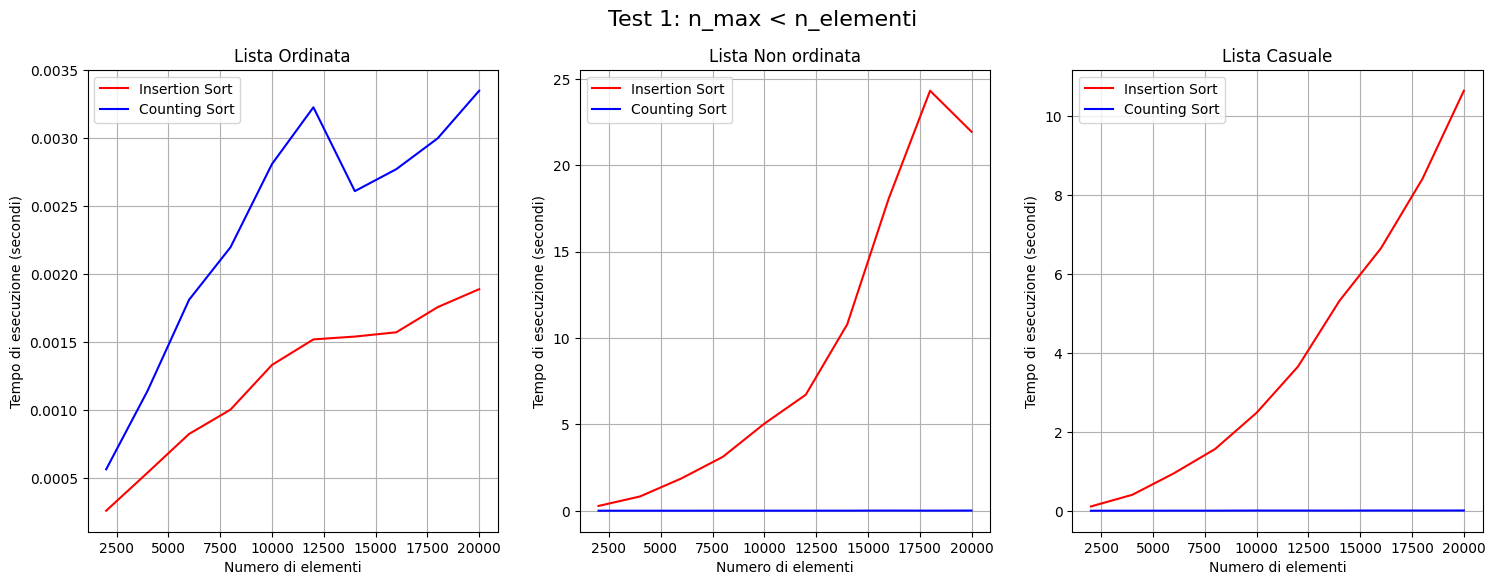

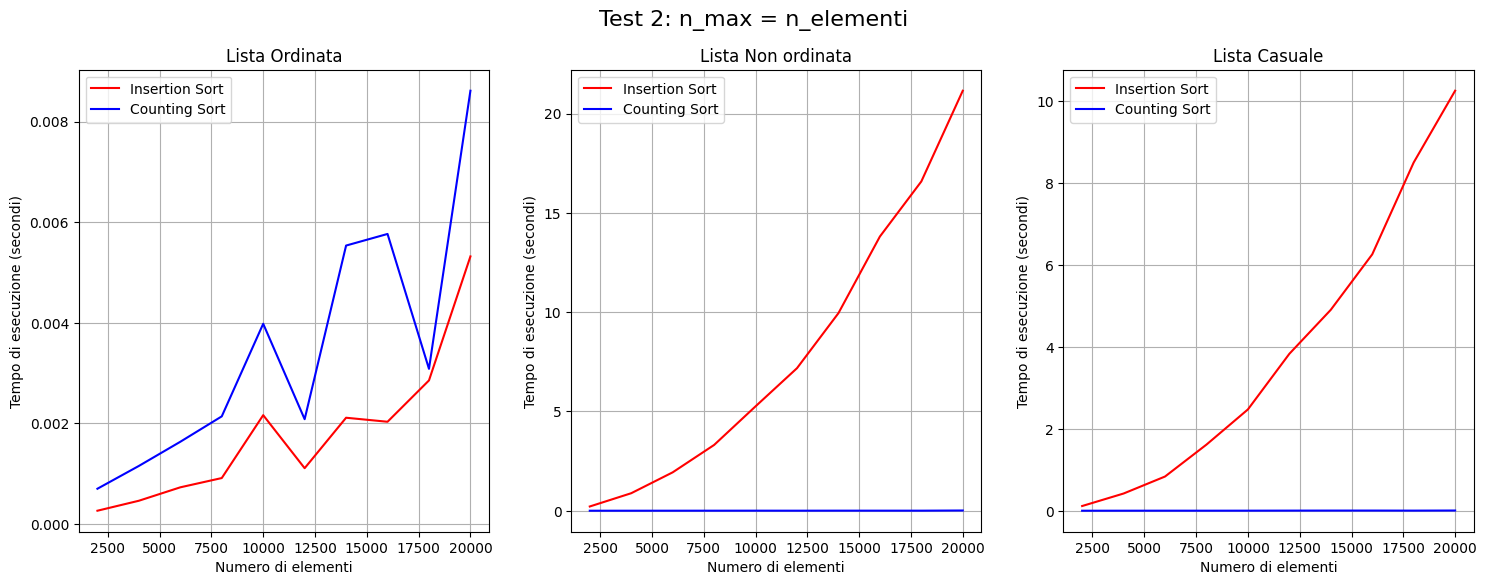

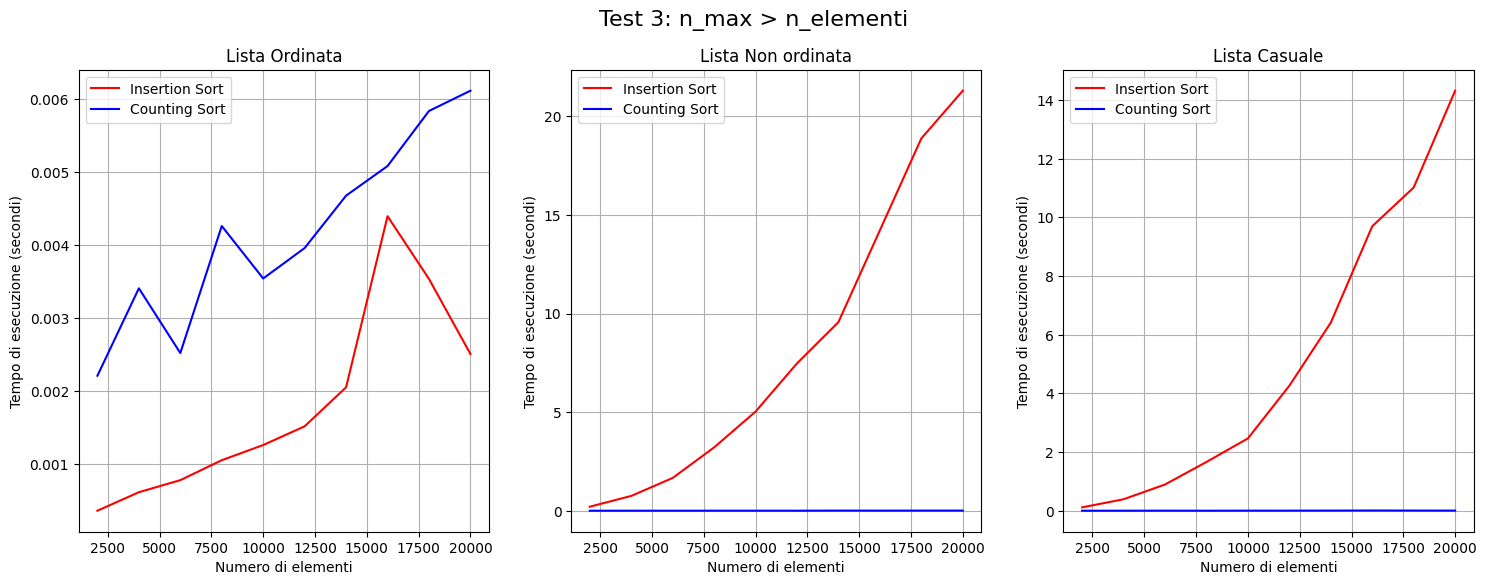

In [10]:
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import random

# Genera una lista casuale
def listaCasuale(nElementi, k):
    lista = []
    for i in range(nElementi-1):
        lista.append(random.randint(0, k))  # inserisce un numero casuale cha va da 0 a k
    lista.append(k) # inserisco numero max per gestire counting
    return lista

# Genera una lista ordinata
def listaOrdinata(nElementi, k):
    lista = listaCasuale(nElementi,k) # genero i numeri casuali con la funzione listaCasuale()
    lista.sort() # ordino la lista
    return lista

# Genera una lista ordinata al contrario
def listaNonOrdinata(nElementi,k):
    lista = listaCasuale(nElementi,k) # genero i numeri casuali con la funzione listaCasuale()
    lista.sort(reverse=True)    # lista ordinata al contrario
    return lista

# test
def test(algLista, nElementi, iter, k, tipoLista, ax):
    dimensioni_lista = []
    insertion_sort_t = []           # tempo insertion-sort
    insertion_sort_cumulativo = 0   # accumulatore del tempo di insertion sort
    counting_sort_t = []            # tempo counting-sort
    counting_sort_cumulativo = 0    # accumulatore del tempo di counting sort

    for i in range(iter):
        n = nElementi * (i + 1)     # incremento il numero di elementi ad ogni iterazione
        dimensioni_lista.append(n) 
        lista = algLista(n, k)      # genera la lista con n elementi con la tipologia di lista passata come riferimento
        copia_lista = lista.copy()  # copia della lista per counting Sort
        
        # Misurazione tempo Insertion Sort
        start = timer()
        Insertion_sort(lista)
        stop = timer()
        insertion_sort_cumulativo = (stop-start)   # somma il tempo attuale a quello precedente
        insertion_sort_t.append(insertion_sort_cumulativo) 
        
        # Misurazione tempo Counting Sort
        start = timer()
        Counting_sort(copia_lista)
        stop = timer()
        counting_sort_cumulativo = (stop - start)  # somma il tempo attuale a quello precedente
        counting_sort_t.append(counting_sort_cumulativo)
        
    # Grafico
    ax.plot(dimensioni_lista, insertion_sort_t, 'r', label='Insertion Sort')
    ax.plot(dimensioni_lista, counting_sort_t, 'b', label='Counting Sort')
    ax.set_xlabel('Numero di elementi')
    ax.set_ylabel('Tempo di esecuzione (secondi)')
    ax.set_title(f'Lista {tipoLista}')  # f serve per stampare tipoLista
    ax.legend()
    ax.grid(True)   # attiva la griglia
    
# Esecuzione test e raggruppamento grafici
def esegui_test_gruppo(n_elementi, n_max, iterazioni, titolo_gruppo):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # creo una figura con tre sottotrame, quindi per ogni riga inserisco tre grafici
    fig.suptitle(titolo_gruppo, fontsize=16)        # titolo del gruppo di grafici

    test(listaOrdinata, n_elementi, iterazioni, n_max, "Ordinata", axs[0])          # test con lista ordinata
    test(listaNonOrdinata, n_elementi, iterazioni, n_max, "Non ordinata", axs[1])   # test con lista ordinata al contrario
    test(listaCasuale, n_elementi, iterazioni, n_max, "Casuale", axs[2])            # test con lista casuale
    plt.show()

# Main
n_elementi = 2000   # numero elementi
n_max =  1000       # numero max
iterazioni = 10     # numero iterazioni

# Inizio Test con n_max < n_elementi
esegui_test_gruppo(n_elementi, n_max, iterazioni, 'Test 1: n_max < n_elementi')

# Inizio Test con n_max = n_elementi 
esegui_test_gruppo(n_elementi, n_elementi, iterazioni, 'Test 2: n_max = n_elementi')

# Inizio Test con n_max > n_elementi 
esegui_test_gruppo(n_elementi, n_elementi * 5, iterazioni, 'Test 3: n_max > n_elementi')

### Descrizione
Ho eseguito _tre test_ utilizzando _tre tipologie_ di _liste_: **ordinata**, **non ordinata**, **casuale**. 
1. **Test 1:** _n_max < n_elementi_  
In questo test il valore massimo è più piccolo del numero di elementi della lista, quindi k = O(n) e perciò mi aspetto che il costo del counting-sort sia Θ(n) 
per ogni tipo di lista. Per quanto riguarda l'insertion-sort mi aspetto:
    - lista ordinata: costo O(n)
    - lista non ordinata e casuale: costo O(n^2)  
2. **Test 2:** _n_max = n_elementi_  
In questo caso il numero massimo corrisponde al numero di elementi, quindi mi aspetto per il **counting-sort**:
    - costo O(n+k) -> O(n+n) -> O(2n) -> O(n)  

    Mentre rimane uguale al precedente per l'**insertion-sort**:
   - lista ordinata: costo O(n)
   - lista non ordinata e casuale: costo O(n^2)
3. **Test 3:** _n_max > n_elementi_  
Nell'ultimo caso il valore massimo è più grande del numero di elementi, quindi mi aspetto **counting-sort**:
    - O(k+n), quindi costo superiore ai precedenti e determinato da k  

    Mentre non varia per l'**insertion**: 
   - lista ordinata: costo O(n)
   -  lista non ordinata e casuale: costo O(n^2)
  

## Conclusioni e commenti


Dai grafici si nota chiaramente che l'_insertion-sort_ è l'algoritmo più **efficiente** quando si lavora con **liste ordinate**, indipendentemente dal valore massimo degli elementi. Tuttavia, nei casi di **liste non ordinate** o **casuali**, l'_insertion-sort_ risulta **inefficiente** a causa del suo **costo O(n^2)**, che lo rende **molto lento** man mano che la dimensione della lista cresce.


Al contrario, il _counting-sort_ si dimostra **più efficiente** anche nel suo **caso peggiore**, quando **k>n** (valore massimo > numero elementi lista) ed inoltre riesce a mantenere buone prestazioni. Tuttavia, il suo principale **limite** è che funziona solo con numeri **interi non negativi**. Questa limitazione lo rende **inadatto** in situazioni dove si devono gestire numeri negativi o numeri con la virgola, richiedendo quindi l'uso di altri algoritmi in questi casi.


In sintesi, l'_insertion-sort_ è consigliabile per lavorare con **piccole quantità di dati**, soprattutto se i dati sono già **ordinati** o se si devono gestire **numeri negativi o decimali**. Per **quantità maggiori**, anche quando il valore massimo degli elementi supera il numero di elementi della lista, il _counting-sort_ risulta una scelta più vantaggiosa grazie alla sua **efficienza complessiva**.